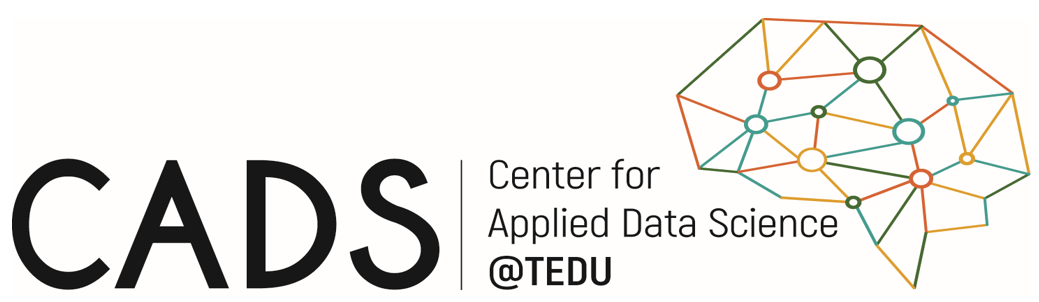

---

Bu notebookta derin öğrenmede algılayıcıların nasıl çalıştığını ve aslında tüm derin öğrenme ve yapay sinir ağları algoritmalarının arka planında yatan teoriyi herhangi bir paket yardımı olmadan fonksiyonlar ve döngülerle kendi yapay sinir ağları mimarimizi oluşturacağız. Böylece, teorisiyle birlikte yapay sinir ağlarının işleyişini net bir şekilde kavramış olacağız.

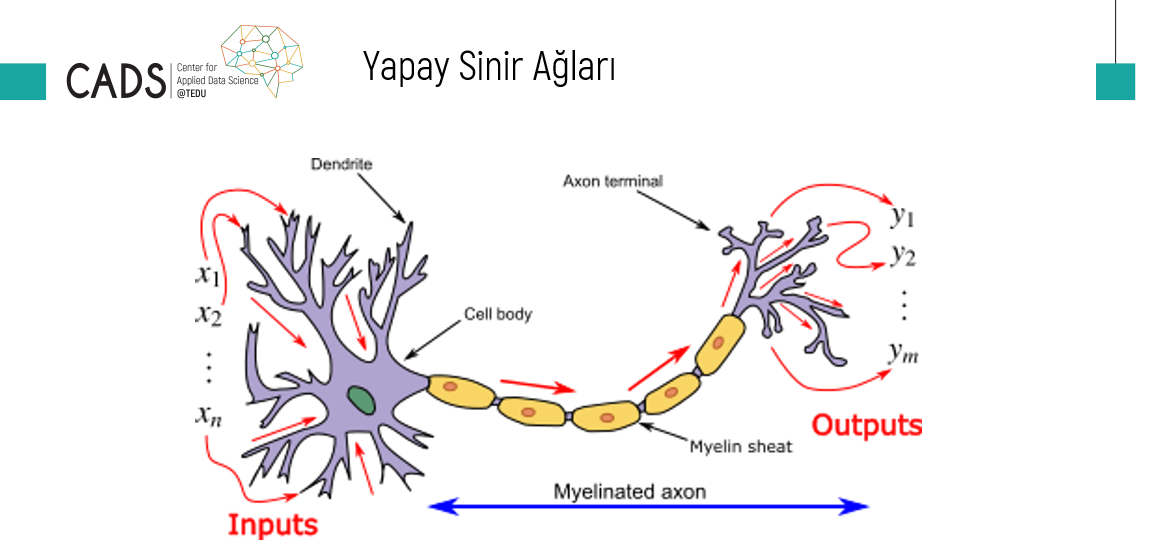

Yapay sinir ağları işleyişi, yukarıdaki görselde de görüldüğü gibi, temelde insan beynindeki sinir hücrelerine oldukça benzemektedir. Dendritten aksonlara girdiler bilgi oluşturacak şekilde girip aksonlara ulaştırır. Aksonlar ise karar verip sonucu belirler. Yani bizim insan olarak alacağımız aksiyon belirlenmiş olur. 

## Algılayıcılar

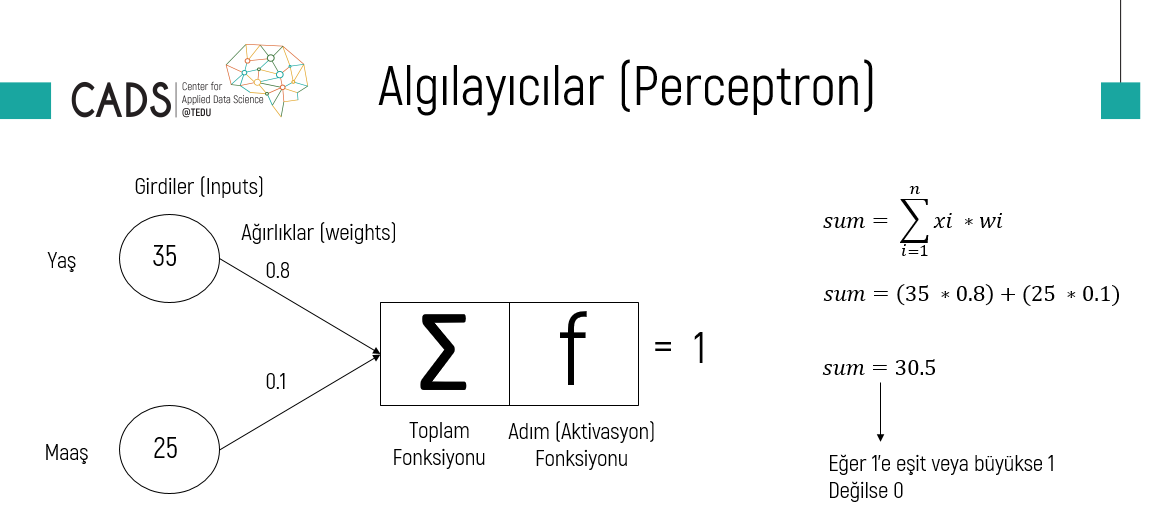

Bir önceki görsel ile yukarıdaki görseli inceleyecek olursak, benzerlikleri görebiliriz. Dendritlere girdi olarak giren yaş ve maaş değişkenleri, ilgili bilgileri aksonlara ileterek sonucun 1 olduğu kararı veriliyor. Burada girdilerimiz veri setimizdeki değişkenlerimiz (özelliklerimiz) oluyor. Basit bir matematik ile yukarıdaki çıktının nasıl 1 sonucuna vardığını görebilirsiniz. Toplam fonksiyonu ile elde edilen değere bir adım (aktivasyon) fonksiyonu uygulanıp ilgili çıktı elde ediliyor. Tüm yapay sinir ağları algoritmalarındaki temel amaç, rastgele oluşturulan ağırlık değerlerinin hatayı minimize edecek şekilde optimal değerlere dönüştürülmesidir. Tüm bunları herhangi bir paket yardımı olmadan kodlayacağız. Yukarıdaki şemayı koda dökelim.

### Girdiler ve Ağırlıklar

In [1]:
import numpy as np
girdiler = np.array([35, 25])

In [2]:
agirliklar = [-0.8, 0.1] #Ağırlıklar başlangıçta rastgele oluşturulmaktadır

### Toplam Fonksiyonu

In [3]:
def sum(girdiler, agirliklar):
    toplam = 0
    for i in range(2): #veya len(girdiler)
        toplam = toplam + (girdiler[i]*agirliklar[i])
    return toplam

Fonksiyonumuz çalışıyor mu inceleyelim:

In [4]:
(35*(-0.8)) + (25*0.1)

-25.5

In [5]:
sum(girdiler, agirliklar)

-25.5

Fonksiyonumuz düzgün bir şekilde çalışıyor.

### Adım (Aktivasyon) Fonkyisonu

Yukarıdaki toplam fonksiyonundan gelen değerin 1'den büyük olduğu durumlarda 1, diğer durumlarda 0 döndüren fonksiyonu yazalım.

In [6]:
def adim(toplam):
    if toplam >= 1:
        return 1
    else:
        return 0

Toplam fonksiyonumuzun sonucu negatif olduğu için adım fonksiyonumuzun 0 döndürmesi gerekiyor. Kontrol edelim.

In [7]:
adim(sum(girdiler, agirliklar))

0

Adım fonksiyonumuz düzgün bir şekilde çalışıyor.

Yukarıdaki toplam fonksiyonunu **numpy** kütüphanesi ile yazmak isteseydik:

In [8]:
import numpy as np

In [9]:
girdiler = np.array([35, 25])
agirliklar = np.array([-0.8, 0.1])

In [10]:
#Toplam fonksiyonu
def sum(girdiler, agirliklar):
    return girdiler.dot(agirliklar)

In [11]:
#Aynı sonuç kontrolü
sum(girdiler, agirliklar)

-25.5

Numpy .dot() metodu yardımı ile 2 vektör arasında eleman bazlı çarpım ve toplam işlemini kolayca gerçekleştirebiliyoruz.

In [12]:
adim(sum(girdiler, agirliklar))

0

Öğrendiklerimizi daha da net anlayabilmek için klasik **"VE"** operatörü veri seti oluşturup uygulayalım.

## "VE" Operatörü Veri Seti

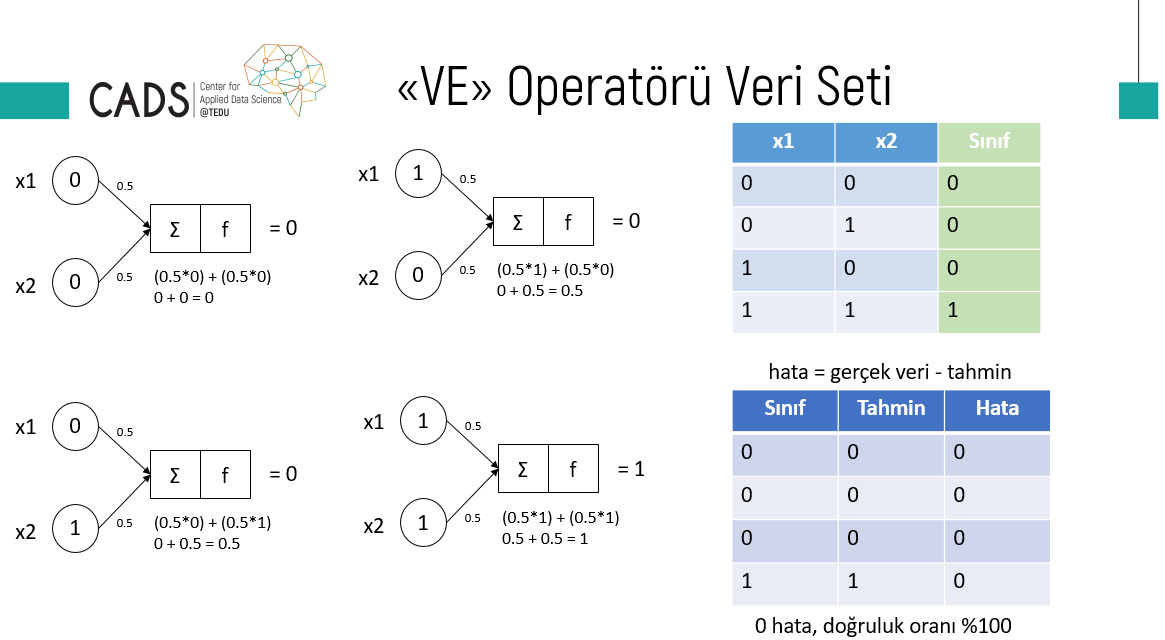

## Girdiler, Çıktılar ve Ağırlıklar

Yukarıdaki görseldeki veri setimizi oluşturalım:

In [13]:
girdiler = np.array([[0,0], [0,1], [1,0], [1,1]])

In [14]:
ciktilar = np.array([0,0,0,1])

In [15]:
agirliklar = np.array([0.0, 0.0])

Tekrar hatırlamak adına yukarıda kurduğumuz "adim" fonksiyonunu tekrar yazalım:

In [16]:
def adim(toplam):
    if toplam >= 1:
        return 1
    return 0

Çıktıyı direkt hesaplayan fonksiyonu yazalım:

In [17]:
def cikti(veriler):
    toplam = veriler.dot(agirliklar)
    return adim(toplam)

Örneğin verimizin son satırındaki x1 ve x2 değerleri girdimiz olsaydı:

In [18]:
cikti(np.array([[1,1]]))

0

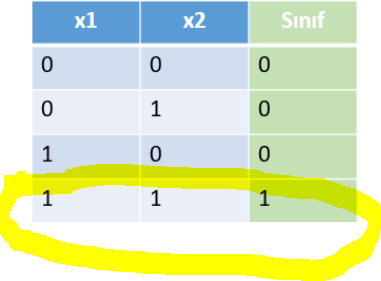

Gördüğümüz gibi çıktı sonucu bu girdiye ve ağırlıklara göre 0 sonucunu verdi. Veri setimizi kontrol ettiğimizde bu satıra karşılık gelen değerin 1 olduğunu görüyoruz. Dolayısıyla bu çıktıyı doğru çıkarabilecek şekilde ağırlıkları güncellememiz (optimize) gerekiyor.

## Öğrenme Fonksiyonu

In [19]:
girdiler

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [20]:
def train():
    toplam_hata = 1 #Toplam hata 1'den (%100'den) başlasın
    while toplam_hata != 0: #Döngü hata 0'lanana kadar devam etsin
        toplam_hata = 0 #Toplam hata girdisi
        for i in range(len(ciktilar)): #Veri setindeki her satır için
            tahmin = cikti(girdiler[i]) #cikti fonksiyonu kullanarak veri setindeki her satır için bir tahmin yap
            hata = abs(ciktilar[i]-tahmin) #Her tahmin için gerçek çıktı ile hatayı hesapla
            toplam_hata = toplam_hata + hata #Her hatayı bir önceki ile toplayıp toplam hatayı hesapla
            if hata > 0: #Eğer hata 0'dan büyükse
                for j in range(len(agirliklar)): #Her ağırlık için (Bu durumda 2 ağırlık var)
                    agirliklar[j] = agirliklar[j] + (learning_rate * girdiler[i][j] * hata) #Ağırlıkları bu formüle göre güncelle
                    print('Güncellenen ağırlık: ' + str(agirliklar[j])) #Güncellenen ağırlıkları ekrana yazdır
        print('Toplam hata: ' + str(toplam_hata)) #Toplam hatayı ekrana yazdır

In [21]:
#Öğrenme oranı (learning rate)
learning_rate = 0.1

Öğrenme oranı 0 ile 1 arasında değer alabilir. Aslında yapay sinir ağlarında hiperparametrelerden biridir. Ne kadar büyük olursa model o kadar hızlı sonuca varır fakat hataların minimum olduğu nokta kaçırılabilir. Ne kadar küçük olursa model o kadar yavaş sonuca varır. Fakat, hataların minimum olduğu nokta tespit edilebilir. Literatürde 0.01 ve 0.03 gibi değerler çokça kullanılsa da, farklı değerleri denemeye açık bir parametredir.

In [22]:
train()

Güncellenen ağırlık: 0.1
Güncellenen ağırlık: 0.1
Toplam hata: 1
Güncellenen ağırlık: 0.2
Güncellenen ağırlık: 0.2
Toplam hata: 1
Güncellenen ağırlık: 0.30000000000000004
Güncellenen ağırlık: 0.30000000000000004
Toplam hata: 1
Güncellenen ağırlık: 0.4
Güncellenen ağırlık: 0.4
Toplam hata: 1
Güncellenen ağırlık: 0.5
Güncellenen ağırlık: 0.5
Toplam hata: 1
Toplam hata: 0


Toplam 4 ağırlık güncellemesinden sonra toplam hatamızı 0'a indirebildik. Bu durumda ağırlıkların 0.5 olarak kullandığımız bir modelde bu veri setini %100 doğru sınıflandırabiliyoruz demektir. Öğrenme fonksiyonunun içindeki fonksiyon tam olarak bunu yapmaktadır. Çıktıdan geri girdilere doğru gidip, hatalara göre ağırlıkları güncellenmektedir. Literatürde buna backpropagation (geri yayılım) denilmektedir.

## Sınıflandırma

In [23]:
agirliklar

array([0.5, 0.5])

0.0 olan ağırlıklarımızın güncellendiğini görüyoruz.

Bu ağırlıklara göre son satırımızdaki girdilere göre çıktıyı tahmin etmeye çalışalım.

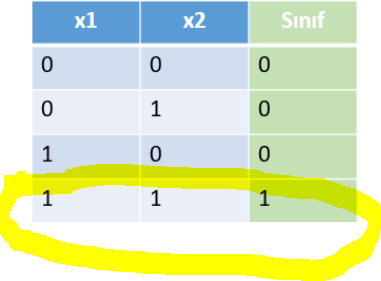

In [24]:
cikti(np.array([[1,1]]))

1

Doğru tahmin! Modelimizin optimal ağırlıkları 0.5'tir.

## "VEYA" Operatörü Veri Seti

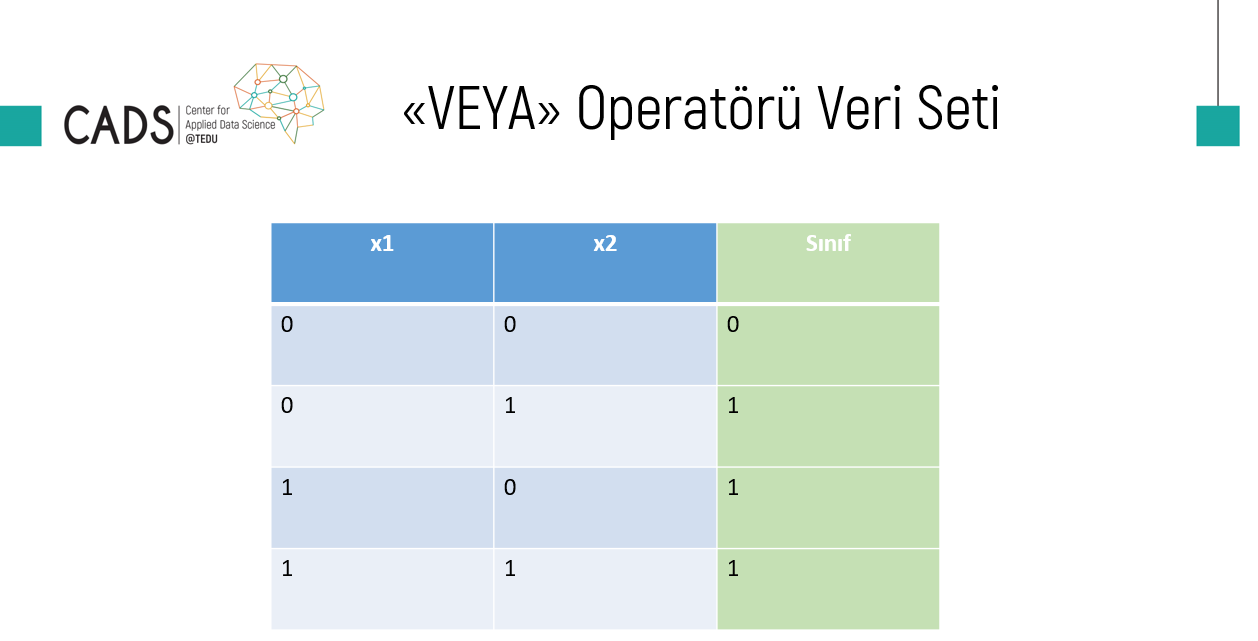

Veya operatörü veri setimizde ilk veri setinden farklı olarak çıktılar veya operatörüne göre düzenlenmiştir. Ve operatöründe 0,0,0,1 olan çıktılar burada 0,1,1,1 şeklindedir.

Veri setimizi ve başlangıç ağırlıklarımızı oluşturalım:

In [25]:
girdiler = np.array([[0,0], [0,1], [1,0], [1,1]])
ciktilar = np.array([0, 1, 1, 1])
agirliklar = np.array([0.0, 0.0])

Öğrenme oranımızı belirleyelim:

In [26]:
learning_rate = 0.1

Daha önceden oluşturduğumuz fonksiyonları hatırlamak amacıyla tekrar oluşturalım:

In [27]:
def adim(toplam):
    if toplam >= 1:
        return 1
    return 0

In [28]:
def cikti(veriler):
    toplam = veriler.dot(agirliklar)
    return adim(toplam)

Öğrenme fonksiyonumuzu da tekrar aynı şekilde yazalım:

In [29]:
def train():
    toplam_hata = 1 #Toplam hata 1'den (%100'den) başlasın
    while toplam_hata != 0: #Döngü hata 0'lanana kadar devam etsin
        toplam_hata = 0 #Toplam hata girdisi
        for i in range(len(ciktilar)): #Veri setindeki her satır için
            tahmin = cikti(girdiler[i]) #cikti fonksiyonu kullanarak veri setindeki her satır için bir tahmin yap
            hata = abs(ciktilar[i]-tahmin) #Her tahmin için gerçek çıktı ile hatayı hesapla
            toplam_hata = toplam_hata + hata #Her hatayı bir önceki ile toplayıp toplam hatayı hesapla
            if hata > 0: #Eğer hata 0'dan büyükse
                for j in range(len(agirliklar)): #Her ağırlık için (Bu durumda 2 ağırlık var)
                    agirliklar[j] = agirliklar[j] + (learning_rate * girdiler[i][j] * hata) #Ağırlıkları bu formüle göre güncelle
                    print('Güncellenen ağırlık: ' + str(agirliklar[j])) #Güncellenen ağırlıkları ekrana yazdır
        print('Toplam hata: ' + str(toplam_hata)) #Toplam hatayı ekrana yazdır

Modelimizi bu girdi, çıktı ve ağırlıklara göre eğitelim:

In [30]:
train()

Güncellenen ağırlık: 0.0
Güncellenen ağırlık: 0.1
Güncellenen ağırlık: 0.1
Güncellenen ağırlık: 0.1
Güncellenen ağırlık: 0.2
Güncellenen ağırlık: 0.2
Toplam hata: 3
Güncellenen ağırlık: 0.2
Güncellenen ağırlık: 0.30000000000000004
Güncellenen ağırlık: 0.30000000000000004
Güncellenen ağırlık: 0.30000000000000004
Güncellenen ağırlık: 0.4
Güncellenen ağırlık: 0.4
Toplam hata: 3
Güncellenen ağırlık: 0.4
Güncellenen ağırlık: 0.5
Güncellenen ağırlık: 0.5
Güncellenen ağırlık: 0.5
Toplam hata: 2
Güncellenen ağırlık: 0.5
Güncellenen ağırlık: 0.6
Güncellenen ağırlık: 0.6
Güncellenen ağırlık: 0.6
Toplam hata: 2
Güncellenen ağırlık: 0.6
Güncellenen ağırlık: 0.7
Güncellenen ağırlık: 0.7
Güncellenen ağırlık: 0.7
Toplam hata: 2
Güncellenen ağırlık: 0.7
Güncellenen ağırlık: 0.7999999999999999
Güncellenen ağırlık: 0.7999999999999999
Güncellenen ağırlık: 0.7999999999999999
Toplam hata: 2
Güncellenen ağırlık: 0.7999999999999999
Güncellenen ağırlık: 0.8999999999999999
Güncellenen ağırlık: 0.89999999999999

Bir önceki ve operatörü veri setine göre veya operatörü veri seti 8 güncelleme sonrasında 0 toplam hataya ulaşabildi. Yani modelimiz yine %100 doğrulukla sınıflandırıyor.

Güncellenen ağırlıklarımızın son durumunu kontrol edelim:

In [31]:
agirliklar

array([1.1, 1.1])

Veri setimizdeki ilk gözlemi (satırı) tahmin etmeye çalışalım:

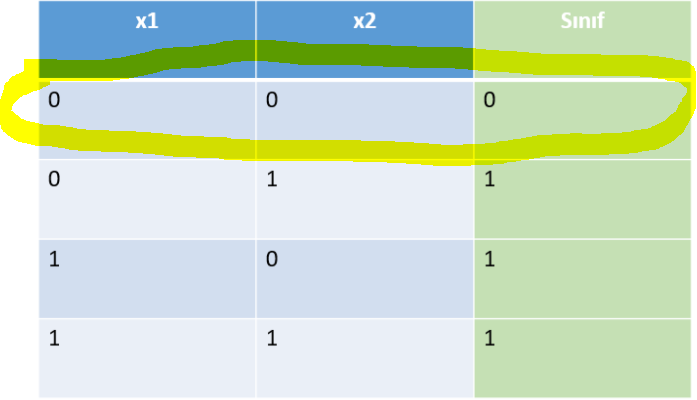

In [32]:
cikti(np.array([[0,0]]))

0

Harika! Yapay sinir ağları modelimiz bu veri setini de doğru bir şekilde tahmin edebiliyor.

# XOR Veri Seti

XOR veri setimiz çok daha karmaşık bir yapıya sahiptir. Bir önceki veri setleri lineer olarak sınıflandırılabiliyorken XOR veri seti lineer olarak sınıflanamamaktadır. Aşağıdaki gibi bir yapıya sahiptir.

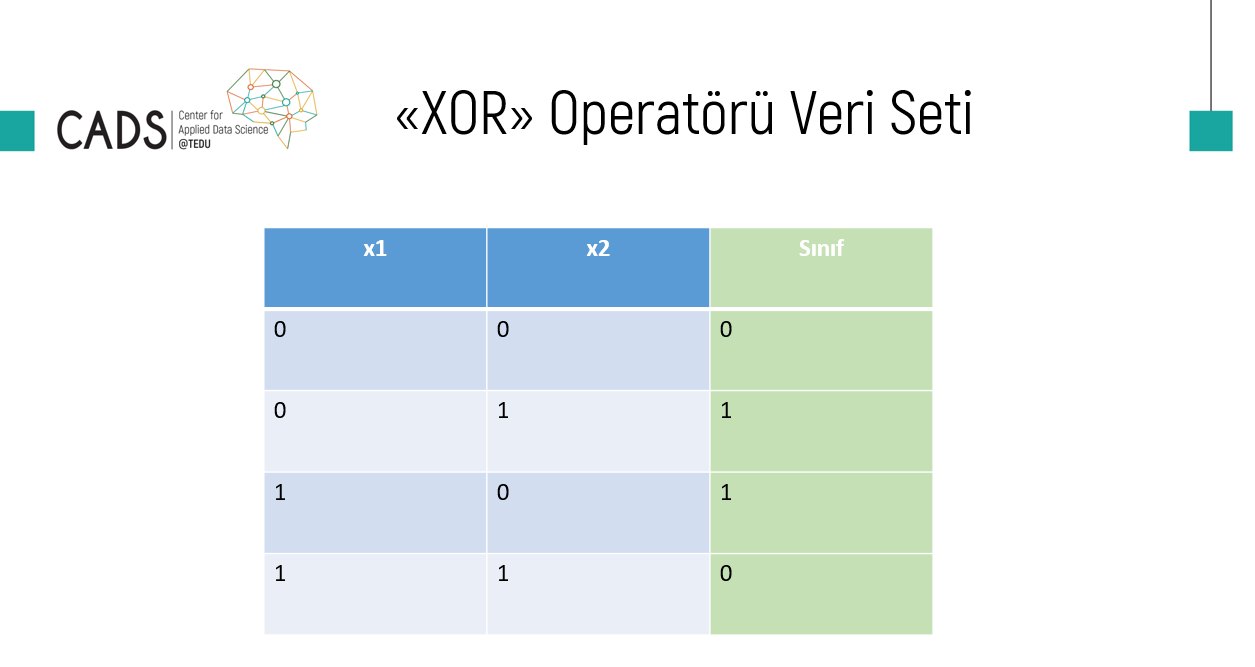

Gördüğümüz gibi veri seti diğer veri setlerine göre bir desen yakalamanın daha zor olduğu bir veri setidir. Peki bir önceki uygulamalar gibi bu veri setine uygun optimal ağırlıkları bulmaya çalışalım.

In [33]:
girdiler = np.array([[0,0], [0,1], [1,0], [1,1]])
ciktilar = np.array([0, 1, 1, 0])
agirliklar = np.array([0.0, 0.0])

Yine fonksiyonlarımızı hatırlama amacıyla yukarıdan kopyalayabiliriz:

In [34]:
def adim(toplam):
    if toplam >= 1:
        return 1
    return 0

In [35]:
def cikti(veriler):
    toplam = veriler.dot(agirliklar)
    return adim(toplam)

In [36]:
def train():
    toplam_hata = 1 #Toplam hata 1'den (%100'den) başlasın
    while toplam_hata != 0: #Döngü hata 0'lanana kadar devam etsin
        toplam_hata = 0 #Toplam hata girdisi
        for i in range(len(ciktilar)): #Veri setindeki her satır için
            tahmin = cikti(girdiler[i]) #cikti fonksiyonu kullanarak veri setindeki her satır için bir tahmin yap
            hata = abs(ciktilar[i]-tahmin) #Her tahmin için gerçek çıktı ile hatayı hesapla
            toplam_hata = toplam_hata + hata #Her hatayı bir önceki ile toplayıp toplam hatayı hesapla
            if hata > 0: #Eğer hata 0'dan büyükse
                for j in range(len(agirliklar)): #Her ağırlık için (Bu durumda 2 ağırlık var)
                    agirliklar[j] = agirliklar[j] + (learning_rate * girdiler[i][j] * hata) #Ağırlıkları bu formüle göre güncelle
                    print('Güncellenen ağırlık: ' + str(agirliklar[j])) #Güncellenen ağırlıkları ekrana yazdır
        print('Toplam hata: ' + str(toplam_hata)) #Toplam hatayı ekrana yazdır

Modelimizi eğitelim:

In [39]:
#train()

Sanki çalışmayı durdurmadığınız sürece sonsuza kadar devam edecekmiş gibi duruyor değil mi? Durdurmazsanız tam da böyle olacak :) Buradaki problem, lineer olarak ayrıştırılamayan bir veri setinde toplam hatanın 0 olmasını beklememizden kaynaklanıyor. Algoritma burada hiçbir zaman toplam 0 hataya ulaşamadığı için sonsuza kadar devam edecektir. **Epoch** kelimesi literatüre bu olayda dahil olmuştur. Girdilerden çıktılara, çıktılardan girdilere tekrar gidip ağırlık düzenleme işlemi 1 epoch'a eşit olmaktadır. Yani veri setinin üzerinden 1 kere geçip ağırlık güncelleme, aslında 1 epoch'tur. veri setinin üzerinden kaç kere geçeceğimizi önceden belirtmediğimiz için yukarıdaki döngü, sonsuz döngüye girmiştir.

Peki lineer olarak ayrıştırılamayan veri setleri için makine öğrenmesi alanında, daha kompleks lineer olmayan algoritmalara yönelmek bizim için daha faydalı oluyordu. Peki, yapay sinir ağlarında ne yapabiliriz? Girdi ve çıktı katmanları arasına değişkenler arasındaki ilişkileri yakalayan gizli katmanlar koyabiliriz. Bu kısmı da kavradıktan sonra, görüntü işleme modellerinden metin üretici modellere kadar tüm kompleks yapay sinir ağları ve derin öğrenme modellerinin arka planında yatan işlemleri kavramış olacağız.

# Çok Katmanlı Algılayıcı

Bu kısımda aktivasyon fonksiyonumuzu, 2'li sınıflandırma problemi ile uğraştığımız için **sigmoid** fonksiyonu olarak kullanacağız.

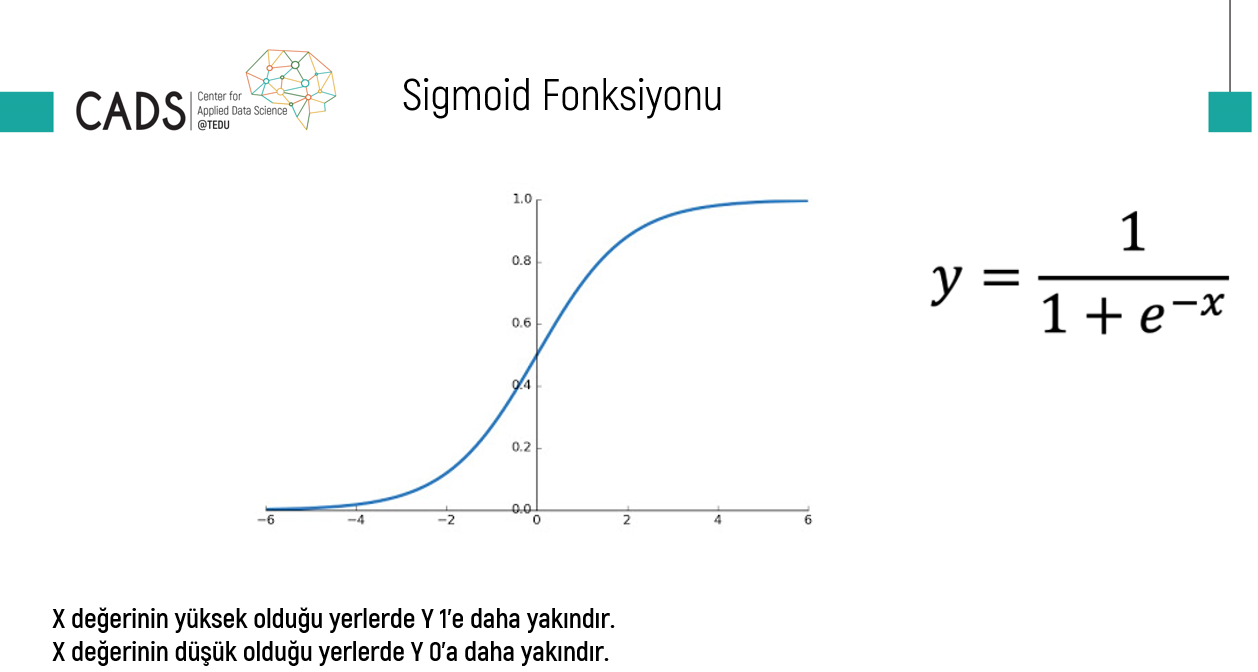

Yukarıdaki görseldeki fonksiyona göre fonksiyonumuzu tanımlayalım.

In [40]:
def sigmoid(toplam):
    return 1 / (1 + np.exp(-toplam))

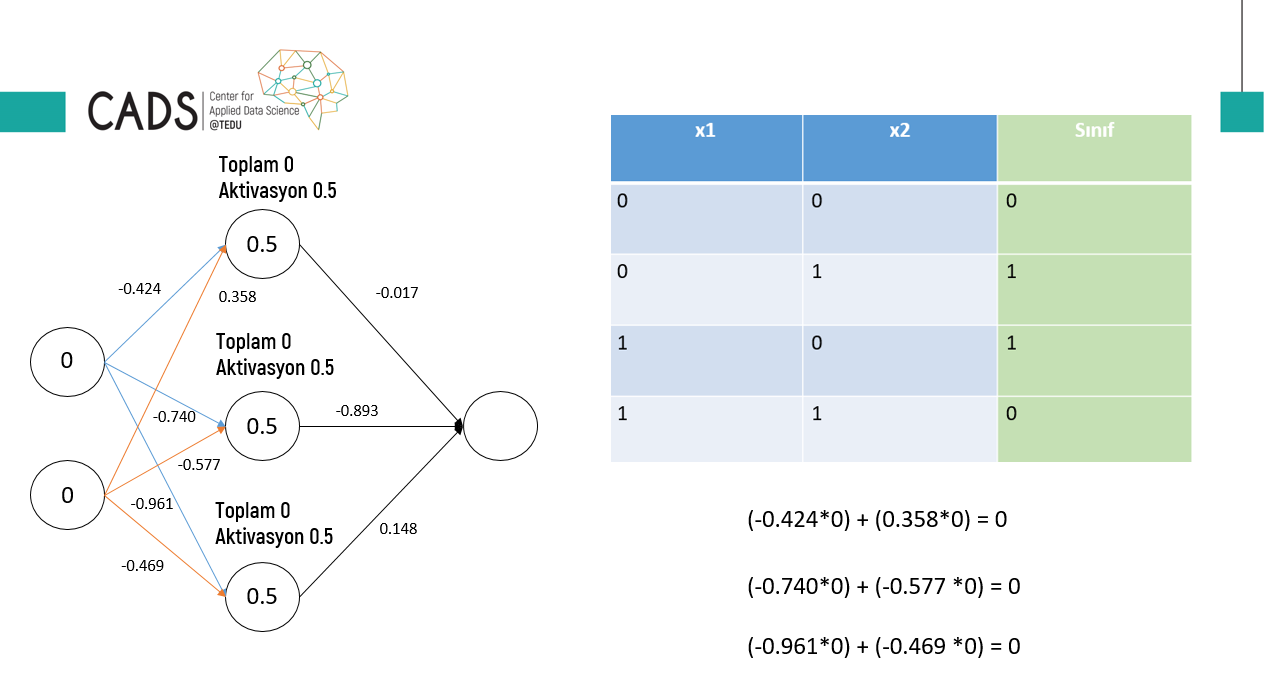

Araya bir gizli katman koyduğumuz için artık **"Derin Öğrenme"** ile ilgileniyoruz demektir. XOR veri setindeki değişkenler arasındaki ilişkileri daha iyi yakalayabilmek için araya bir gizli katman koyduk. Ve bir önceki tek algılayıcılı modellerimiz gibi aynı işlemleri yaptık. Ağırlıkları, girdilerle çarpıp topladıktan sonra aktivasyon fonksiyonu uyguladık.

In [41]:
girdiler = np.array([[0,0], [0,1], [1,0], [1,1]])
ciktilar = np.array([[0], [1], [1], [0]])

Girdiden gizli katmana bilgi taşıyan ilk rastgele ağırlıklarımız:

In [42]:
agirliklar0 = np.array([[-0.424, -0.740, -0.961],
                        [0.358, -0.577, -0.469]])

Gizli katmandan çıktıya bilgi taşıyan ikinci rastgele ağırlıklarımız:

In [43]:
agirliklar1 = np.array([[-0.017],
                       [-0.893],
                       [0.148]])

Girdi katmanından gizli katmana ilk çarpım ve toplamlar:

In [44]:
sinaps0 = np.dot(girdiler, agirliklar0)

In [45]:
sinaps0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

Gizli katman toplamlarına aktivasyon fonksiyonu uygulayalım:

In [46]:
gizli_katman = sigmoid(sinaps0)

In [47]:
gizli_katman

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

Gizli katmandan çıktıya giden çarpım ve toplamları elde edelim:

In [48]:
sinaps1 = np.dot(gizli_katman, agirliklar1)

In [49]:
sinaps1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

Çıktı toplamlarına aktivasyon fonksiyonu uygulayalım:

In [50]:
cikti_katmanı = sigmoid(sinaps1)
cikti_katmanı

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

Modelimiz tek bir ileri besleme ile (geri yayılım (backpropagation) olmadan) yukarıdaki tahminleri elde etmiştir.

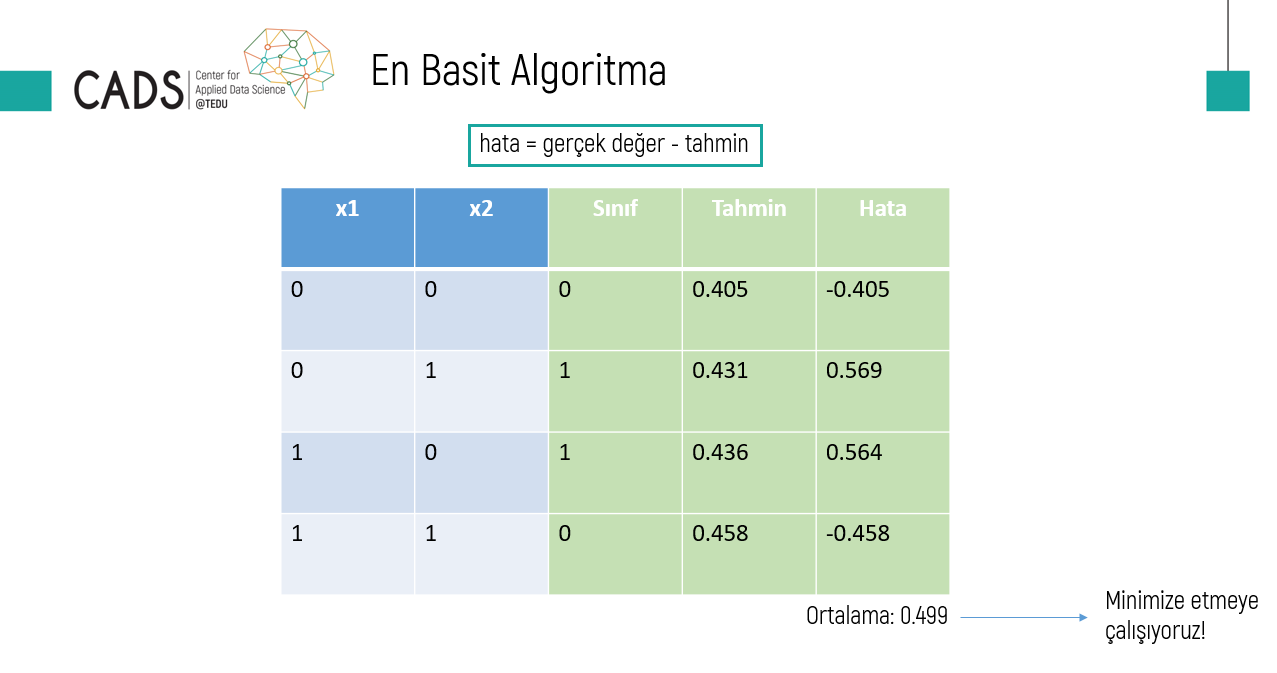

In [51]:
ciktilar

array([[0],
       [1],
       [1],
       [0]])

In [52]:
cikti_katmanı

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [53]:
hata_katmanı = ciktilar - cikti_katmanı

In [54]:
hata_katmanı

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [55]:
ortalama_hata = np.mean(abs(hata_katmanı))

In [56]:
ortalama_hata

0.49880848923713045

Hatayı minimize etmeye çalışıyoruz. Dolayısıyla global bir minimum arıyoruz. Bu global minimumu (minimum hatayı) literatürde gradient descent dediğimiz birinci dereceden yinelemeli optimizasyon algoritmasını kullanarak elde edebiliyoruz.

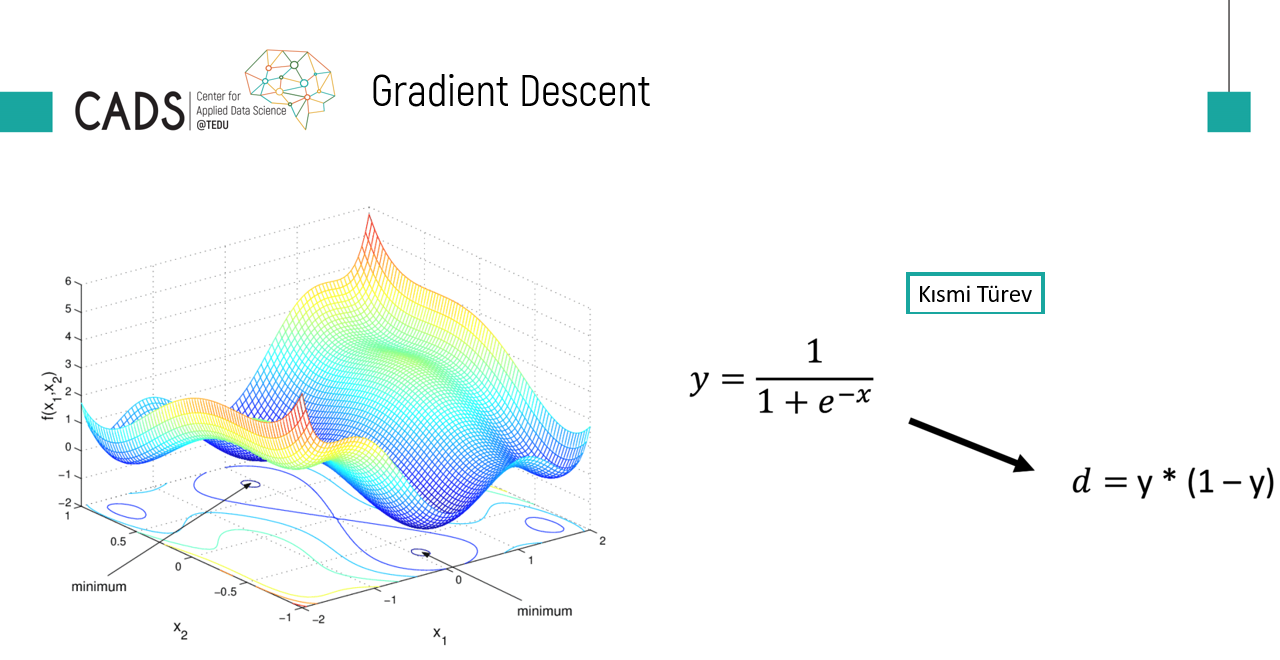

Yukarıdaki görselde ağırlıkların kırmızı noktaların birinde başladığını farz edelim. Burada amaç bu figürün en derin noktasına, minimuma gidebilmek. Ağırlıkların hangi yönde minimuma doğru gideceklerine karar vermek için kısmi türev alıyoruz.

In [57]:
def sigmoid_turev(sigmoid):
    return sigmoid * (1 - sigmoid)

Gradient descent algoritmasının bir parçası olarak çıktının deltasını almamız gerekiyor:

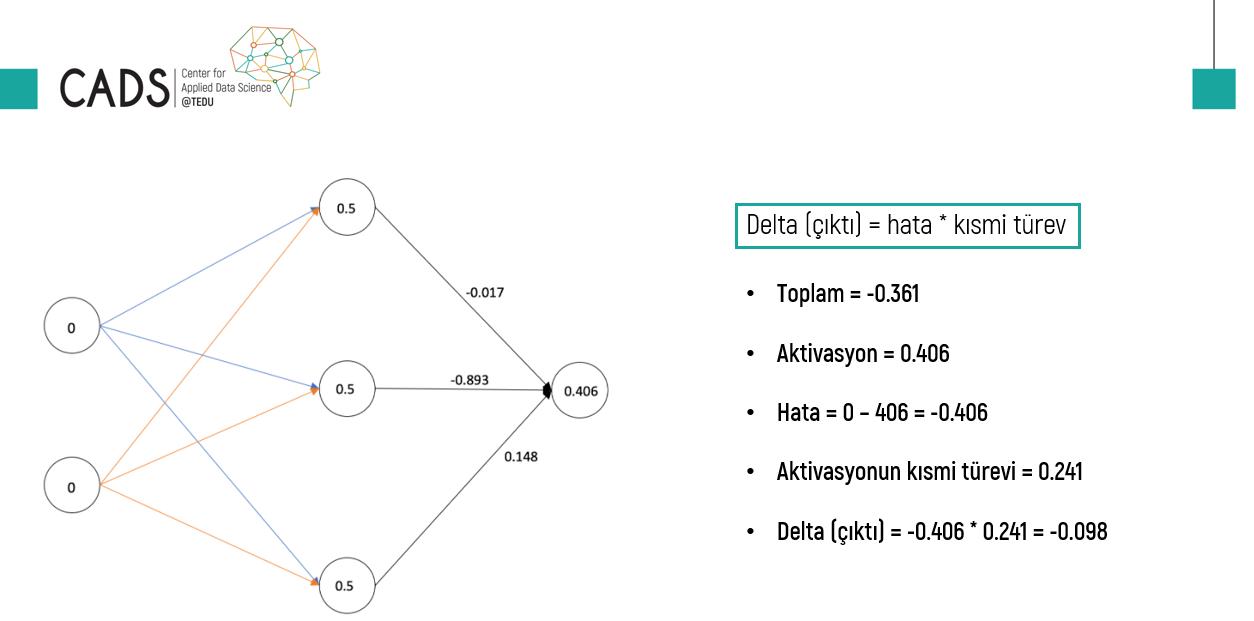

In [58]:
cikti_katmanı

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [59]:
cikti_turevi = sigmoid_turev(cikti_katmanı)
cikti_turevi

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [60]:
hata_katmanı

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [61]:
delta_cikti = hata_katmanı * cikti_turevi

In [62]:
delta_cikti

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

Aynı şekilde gizli katman için de gradient descent algoritması gereği, gizli katman deltası hesaplamamız gerekiyor.

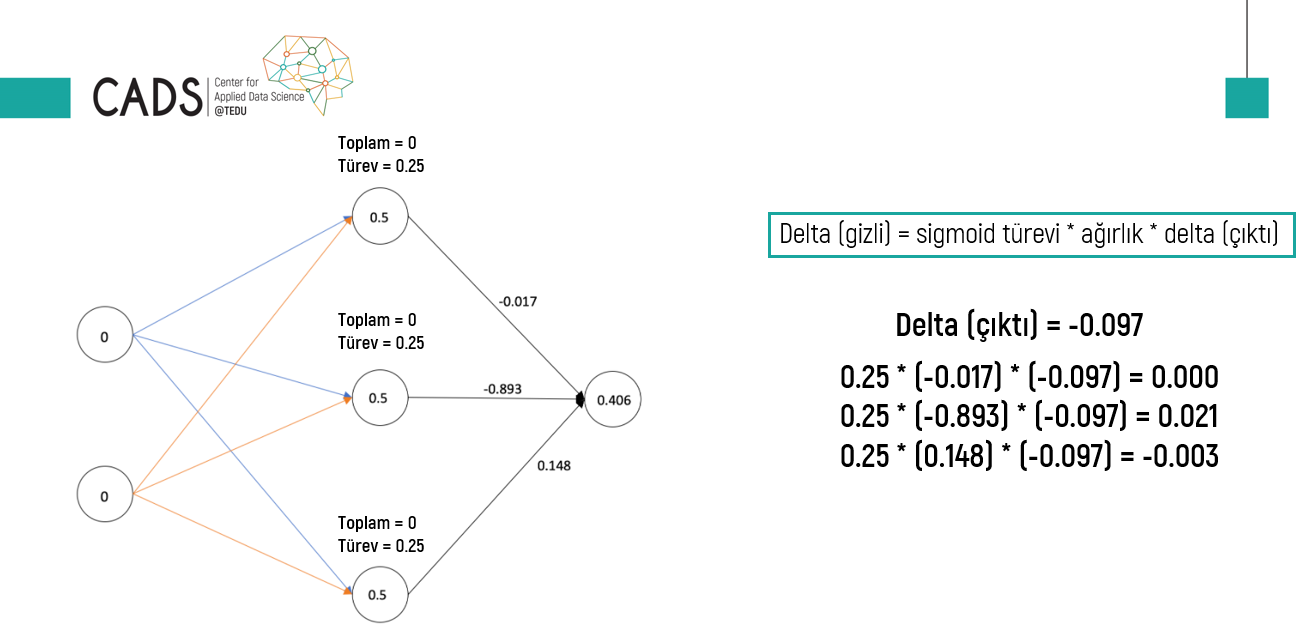

In [63]:
delta_cikti

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [64]:
agirliklar1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [65]:
delta_cikti_x_agirliklar = delta_cikti.dot(agirliklar)

ValueError: shapes (4,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

4x1'lik bir matrisi 3x1'lik matrisle çarpmaya çalıştığımız için hata aldık. 1x3'lük matrise çevirmemiz, yani transpoz almamız lazım.

In [66]:
agirliklar1T = agirliklar1.T

In [67]:
agirliklar1T

array([[-0.017, -0.893,  0.148]])

In [68]:
delta_cikti_x_agirliklar = delta_cikti.dot(agirliklar1T)

In [69]:
gizli_katman

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [70]:
delta_gizli_katman = delta_cikti_x_agirliklar * sigmoid_turev(gizli_katman)

In [71]:
delta_gizli_katman

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

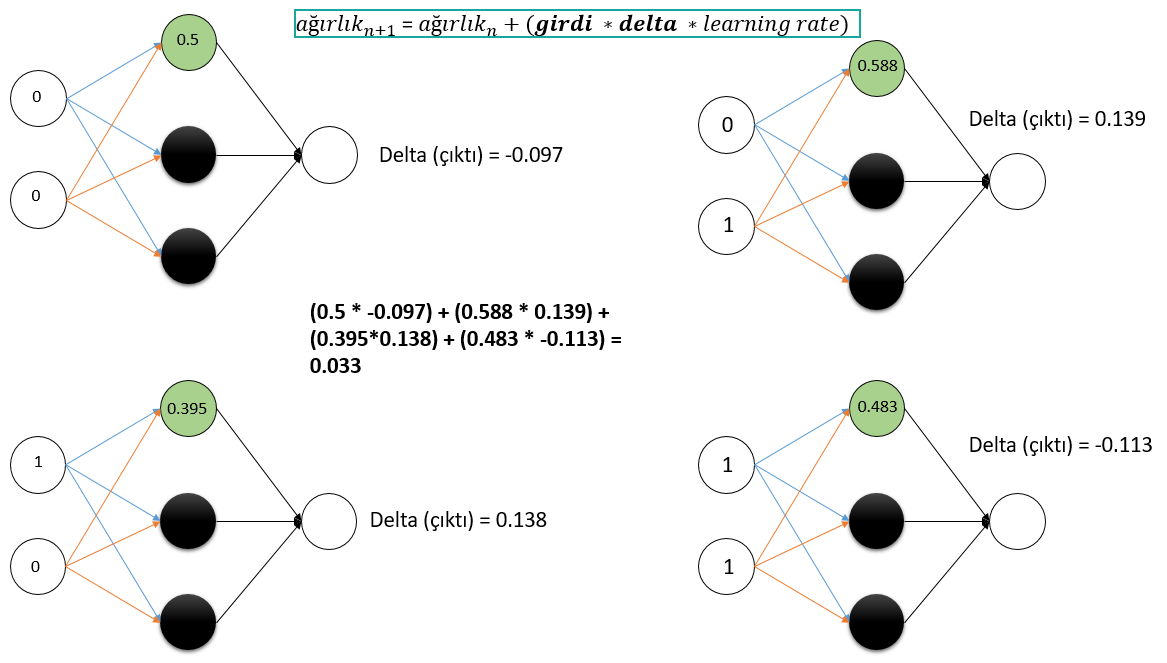

Çıktıdan geri girdi katmanına gittiğimiz için ilk olarak agirlik1 olan çıktıyı gizli katmana bağlayan ağırlıkları güncelleyeceğiz. Yukarıda bunun nasıl yapıldığına dair hazırlanan şemayı ve formülü görebilirsiniz.

In [72]:
gizli_katman

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [73]:
delta_cikti

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [74]:
#Matris çarpımı hatası alacağımız için yine transpozunu alıyoruz
gizli_katmanT = gizli_katman.T

In [75]:
girdi_x_delta1 = gizli_katmanT.dot(delta_cikti)

In [76]:
#Öğrenme oranı belirleyelim

In [77]:
learning_rate = 0.01

In [78]:
agirliklar1 = agirliklar1 + (girdi_x_delta1 * learning_rate)

In [79]:
agirliklar1

array([[-0.01667063],
       [-0.89278082],
       [ 0.14821088]])

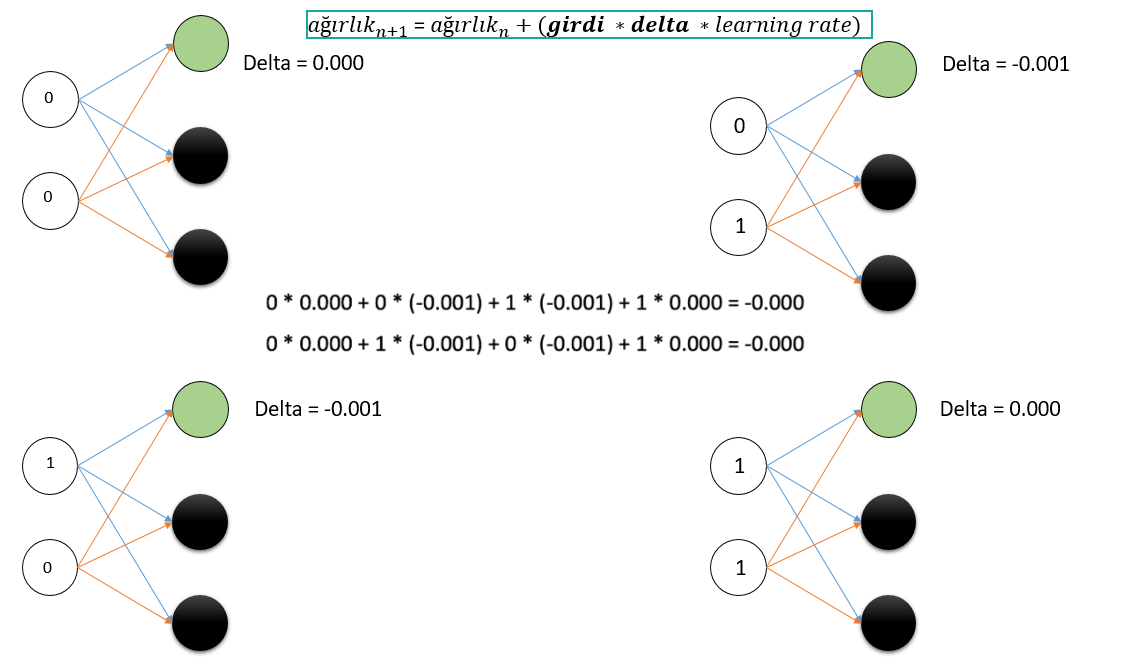

Aynı formülü kullanarak gizli katmanı girdi katmanına bağlayan ağırlıkları da güncelleyebiliriz.

In [80]:
girdiler

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [81]:
delta_gizli_katman

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [82]:
girdilerT = girdiler.T

In [83]:
girdi_x_delta0 = girdilerT.dot(delta_gizli_katman)

In [84]:
agirliklar0 = agirliklar0 + (girdi_x_delta0 * learning_rate)

In [85]:
agirliklar0

array([[-0.4240008 , -0.74010135, -0.96098518],
       [ 0.35799909, -0.57711745, -0.46897738]])

Böylece gizli katmanlı bir yapay sinir ağlarında geri yayılım ve gradient descent kullanarak ağırlıkları 1 epoch ile güncellemiş olduk.

Tüm kodları bir epoch döngüsü içine alarak birleştirelim:

# Baştan Sona Yapay Sinir Ağı

In [86]:
import numpy as np

def sigmoid(toplam):
    return 1 / (1 + np.exp(-toplam))

def sigmoid_turev(sigmoid):
    return sigmoid * (1 - sigmoid)

girdiler = np.array([[0,0], 
                   [0,1], 
                   [1,0], 
                   [1,1]])

ciktilar = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [87]:
#Rastgele oluşturulan ağırlıklar
agirliklar0 = 2 * np.random.random((2, 3)) - 1
agirliklar1 = 2 * np.random.random((3, 1)) - 1

In [88]:
epochs = 1000000
learning_rate = 0.3
hata = []

for epoch in range(epochs):
    sinaps0 = np.dot(girdiler, agirliklar0)
    gizli_katman = sigmoid(sinaps0)
    
    sinaps1 = np.dot(gizli_katman, agirliklar1)
    cikti_katmanı = sigmoid(sinaps1)
    
    hata_katmanı = ciktilar - cikti_katmanı
    ortalama_hata = np.mean(abs(hata_katmanı))
    
    if epoch % 100000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Hata: ' + str(ortalama_hata))
        hata.append(ortalama_hata)
    
    cikti_turevi = sigmoid_turev(cikti_katmanı)
    delta_cikti = hata_katmanı * cikti_turevi
    
    agirliklar1T = agirliklar1.T
    delta_cikti_x_agirliklar = delta_cikti.dot(agirliklar1T)
    delta_gizli_katman = delta_cikti_x_agirliklar * sigmoid_turev(gizli_katman)
    
    gizli_katmanT = gizli_katman.T
    girdi_x_delta1 = gizli_katmanT.dot(delta_cikti)
    agirliklar1 = agirliklar1 + (girdi_x_delta1 * learning_rate)
    
    girdilerT = girdiler.T
    girdi_x_delta0 = girdilerT.dot(delta_gizli_katman)
    agirliklar0 = agirliklar0 + (girdi_x_delta0 * learning_rate)

Epoch: 1 Hata: 0.4973875593197874
Epoch: 100001 Hata: 0.13331085070193852
Epoch: 200001 Hata: 0.02342438523141066
Epoch: 300001 Hata: 0.015265952486849851
Epoch: 400001 Hata: 0.012139409238468988
Epoch: 500001 Hata: 0.010372971847517915
Epoch: 600001 Hata: 0.009201881045439914
Epoch: 700001 Hata: 0.008353147433258792
Epoch: 800001 Hata: 0.0077018968604803655
Epoch: 900001 Hata: 0.007181889015997724


In [89]:
1-0.006706278931832725

0.9932937210681673

%99'luk bir doğru sınıflandırma oranı yakaladık.

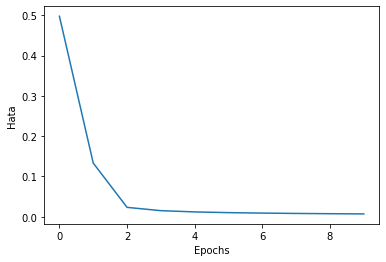

In [90]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Hata')
plt.plot(hata)

Görünüşe göre 200000. epoch'tan sonra modelimiz hata bakımından gözle görülür bir düşüş yaşamamış. Dolayısıyla 1 milyon epoch yerine 200.000 epoch çalıştırmak mantıklı olacaktır.

In [91]:
ciktilar

array([[0],
       [1],
       [1],
       [0]])

In [92]:
cikti_katmanı

array([[0.00736189],
       [0.99420281],
       [0.99420336],
       [0.00806152]])

0.5'ten küçükleri 0, 0.5'ten büyükleri 1 olarak sınıflandıracaksak yapay sinir ağımız %100 doğruluk performansı göstermiştir. Güncellenen ağırlıklar ise aşağıdaki gibidir.

In [93]:
agirliklar0

array([[-12.96517912,  -1.02782802,   5.91300385],
       [  5.90635424,  -1.02823099, -12.98212668]])

In [94]:
agirliklar1

array([[ 16.42978961],
       [-42.67082508],
       [ 16.43293419]])

Tahmin fonksiyonumuzu yazalım.

In [95]:
def tahmin(girdi):
    gizli_katman = sigmoid(np.dot(girdi, agirliklar0))
    cikti_katmani = sigmoid(np.dot(gizli_katman, agirliklar1))
    return cikti_katmani[0]

İlk gözlemimizi tahmin edelim:

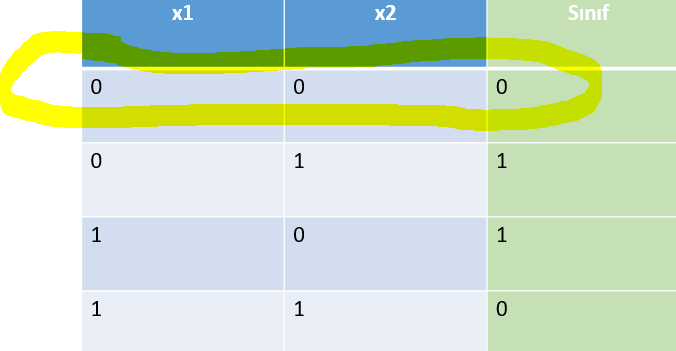

In [96]:
tahmin(np.array([0, 0]))

0.007361881404132879

In [97]:
np.round(tahmin(np.array([0, 0])))

0.0

Süper! Herhangi bir paket kullanmadan kendi derin yapay sinir ağımızı oluşturup %100'lük bir tahmin elde ettik. Daha önceden de belirttiğimiz gibi, görüntü işlemeden metin üretici yapay sinir ağlarına kadar bütün kompleks modellerde arka planda bu işlemler yapılmaktadır. Tensorflow, Pytorch ve Theano gibi kütüphaneler işimizi yukarıdaki işlemleri yapmaksızın kolaylaştırmaktadır.